Import the needed modules

In [4]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

Load the data and Viewing the columns

In [5]:
data_path="D:\GIT\Life_Expectency Prediction\Life Expectancy Data.csv"
le_data=pd.read_csv(data_path)
le_data.columns


Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

Create a Training Set with all the required features and Viewing the outline of the data

In [6]:
le_features=[ 
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']
X=le_data[le_features]
X.head()
X.describe()

,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Setting the Prediction target

In [7]:
y=le_data.Life_expectancy

Now lets see the relation between Life Expectency and the various features and plot a graph
let various features be 'x'(small x)

Let x='Alcohol'

<AxesSubplot:title={'center':'Dependency of Alcohol on Life Expectancy'}, xlabel='Life_expectancy', ylabel='Alcohol'>

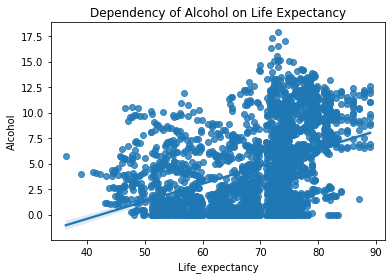

In [8]:
plt.title('Dependency of Alcohol on Life Expectancy')
sns.regplot(y=le_data['Alcohol'],x=le_data['Life_expectancy'])



let x='Hepatitis B'

<AxesSubplot:title={'center':'Dependency of Hepatitis B on Life expectancy'}, xlabel='Life_expectancy', ylabel='Hepatitis B'>

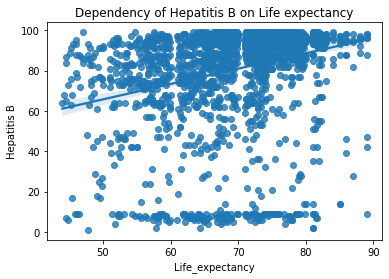

In [9]:
plt.title('Dependency of Hepatitis B on Life expectancy')
sns.regplot(y=le_data['Hepatitis B'],x=le_data['Life_expectancy'])

let x='Measles '

<AxesSubplot:xlabel='Life_expectancy', ylabel='Measles '>

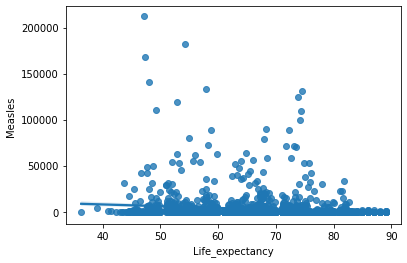

In [10]:
sns.regplot(y=le_data['Measles '],x=le_data['Life_expectancy'])

let x=' BMI '

<AxesSubplot:title={'center':'Dependecy of BMI on Life expectancy'}, xlabel=' BMI ', ylabel='Life_expectancy'>

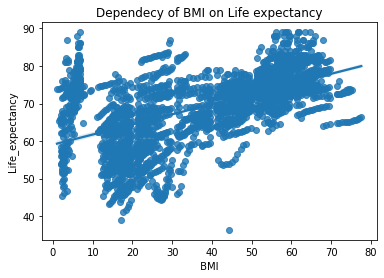

In [11]:
plt.title('Dependecy of BMI on Life expectancy')
sns.regplot(x=le_data[' BMI '],y=le_data['Life_expectancy'])

Lets draw a bar plot to see which country has the most highest life expectency

<AxesSubplot:xlabel='Country', ylabel='Life_expectancy'>

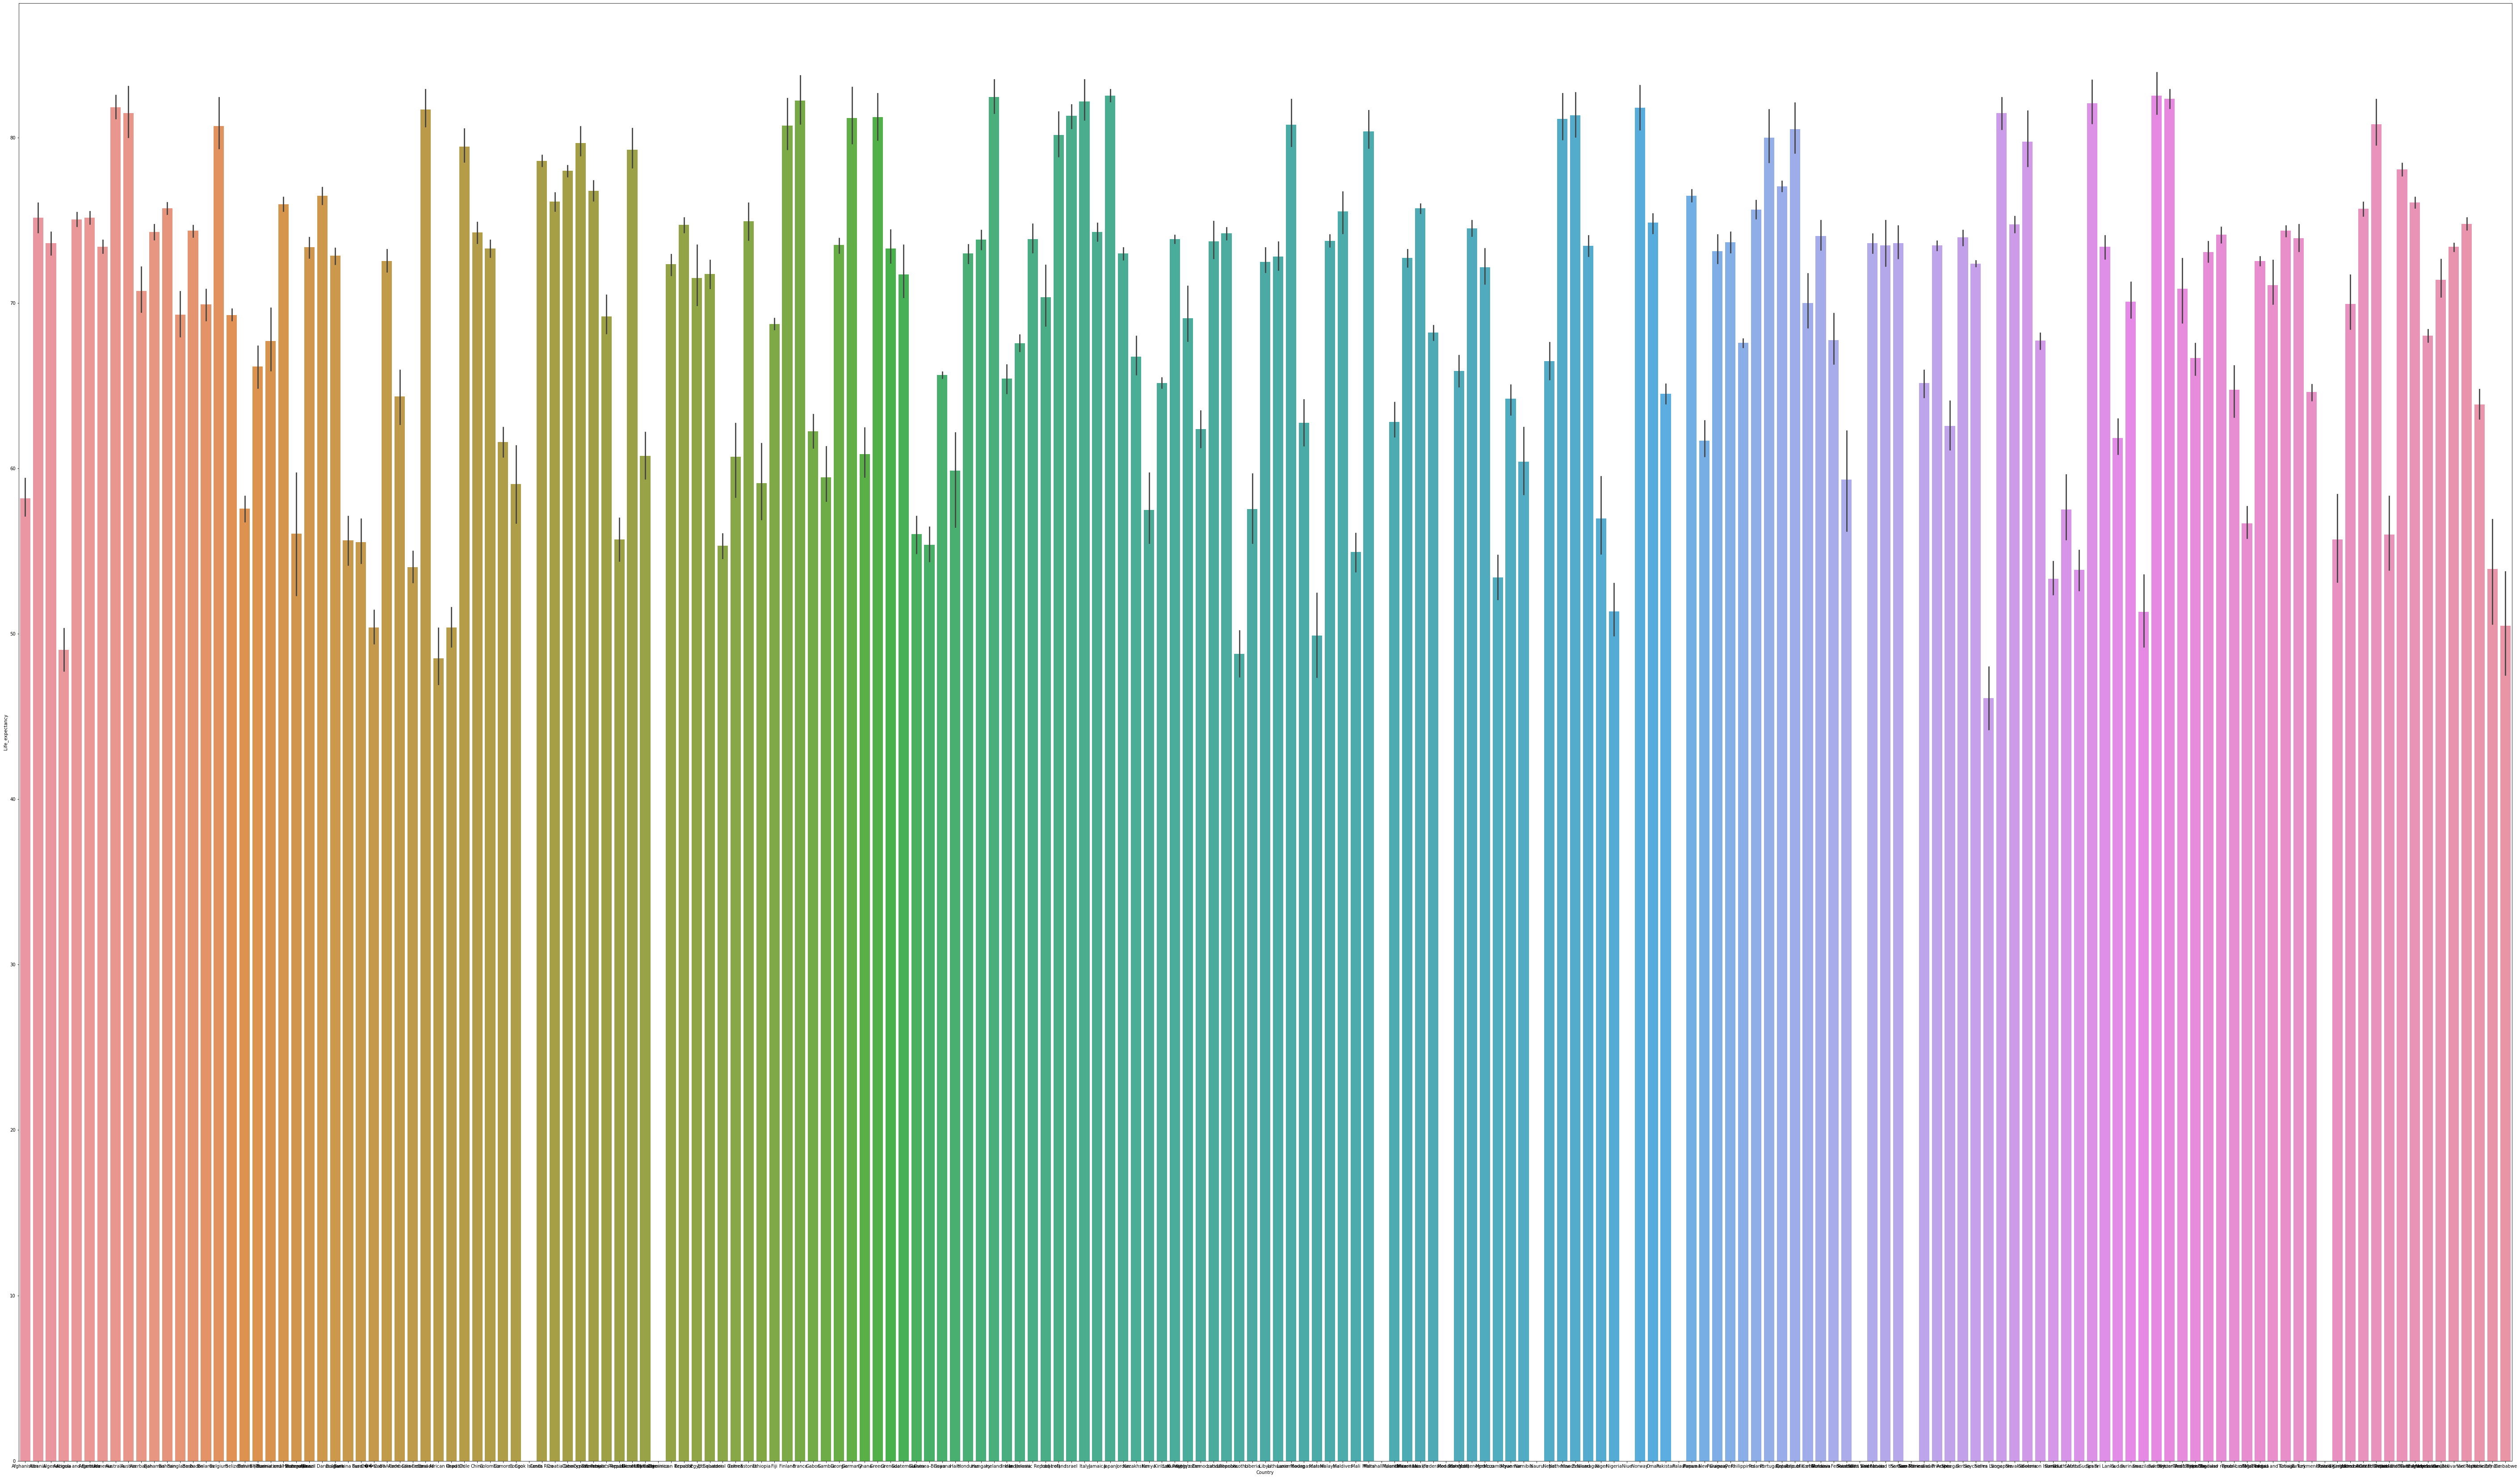

In [12]:

plt.figure(figsize=(100,60))
sns.barplot(x=le_data['Country'],y=le_data['Life_expectancy'])

Data is way too big to be represented

Now lets draw a scatter plot between Life Expectancy and Hiv/Aids

<AxesSubplot:title={'center':'Dependecy of HIV on Life expectancy'}, xlabel='Life_expectancy', ylabel=' HIV/AIDS'>

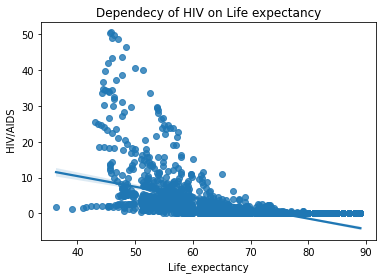

In [13]:
plt.title('Dependecy of HIV on Life expectancy')
sns.regplot(y=le_data[' HIV/AIDS'],x=le_data['Life_expectancy'])

Lets see how Life expectancy changed with time 
To see a pattern of change we generally use lineplot
But we use bar graph here because we need relation between two entities

<AxesSubplot:title={'center':'Change in life expectancy with Time'}, xlabel='Year', ylabel='Life_expectancy'>

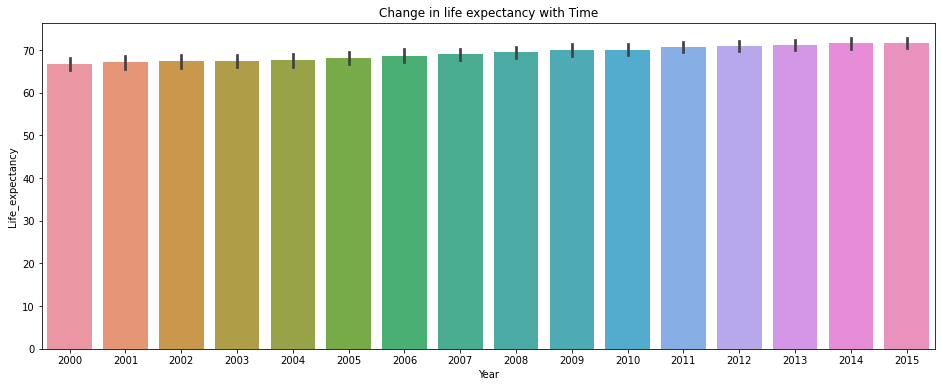

In [14]:
plt.figure(figsize=(16,6))
plt.title('Change in life expectancy with Time')
sns.barplot(x=le_data['Year'],y=le_data['Life_expectancy'])


Lets see how the infants_death_rate changed with years

<AxesSubplot:title={'center':'Change in infant death rate with year'}, xlabel='Year', ylabel='infant deaths'>

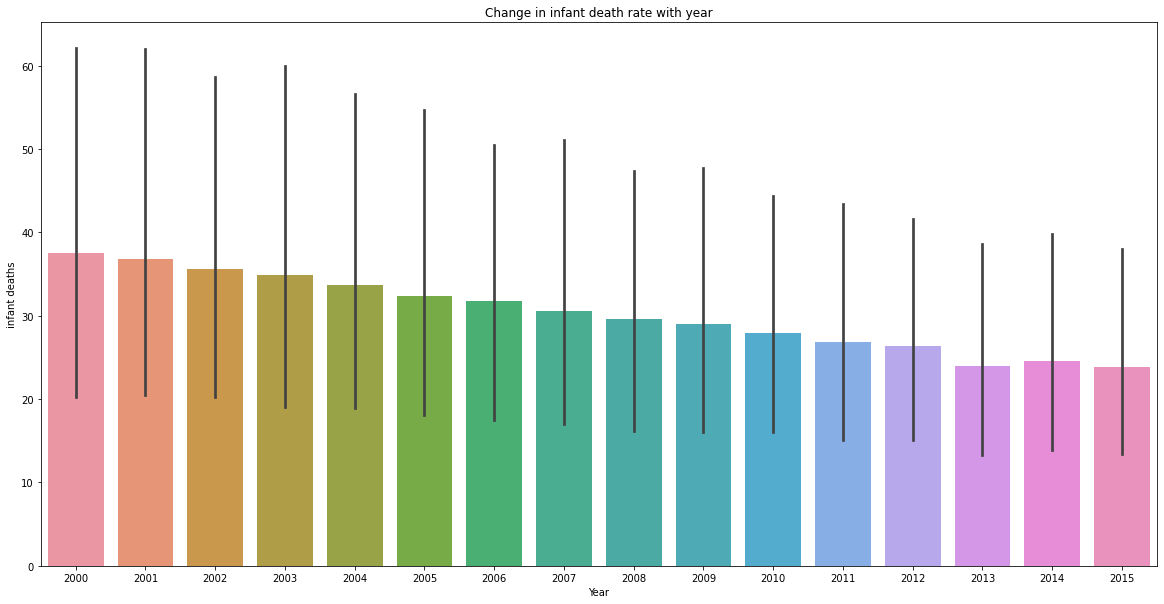

In [25]:
plt.figure(figsize=(20,10))
plt.title('Change in infant death rate with year')
sns.barplot(y=le_data['infant deaths'],x=le_data['Year'])

Now after understanding the data and the varition of Life Expectancy W.R.T features lets Start predicting the values

Let us Split the data into the training values and predicting values 
for this splitting we use train_test_split

In [16]:
from sklearn.model_selection import train_test_split
train_X,val_X,train_y,val_y=train_test_split(X,y,random_state=0)

Now lets edit the missing values and change them to the mean of the respective column
This is done by Imputer 
lets use a simple imputer to impute missing values

In [17]:
from sklearn.impute import SimpleImputer
my_imputer=SimpleImputer()
imputed_X_train=pd.DataFrame(my_imputer.fit_transform(train_X))
imputed_X_val=pd.DataFrame(my_imputer.transform(val_X))
imputed_X_train.columns=train_X.columns
imputed_X_val.columns=val_X.columns
train_y=train_y.fillna(train_y.mean())
val_y=val_y.fillna(val_y.mean())


Lets remove the rows with null values

So after imputing the values lets predict the values

Fitting the data into random forest Regressor

In [18]:
model= RandomForestRegressor()
model.fit(imputed_X_train,train_y)

RandomForestRegressor()

Predicting the values

In [19]:
prediction_values=model.predict(imputed_X_val)
print(prediction_values)

[78.162      66.898      52.954      61.475      59.602      69.084
 74.217      82.545      73.30769098 51.374      65.233      82.317
 74.117      75.495      65.108      74.433      57.022      64.865
 72.885      83.211      73.792      68.54934549 72.518      81.26
 69.476      61.118      82.71       73.39369098 71.582      71.501
 74.988      46.         78.991      74.668      75.456      72.32
 75.63634549 81.89       58.705      72.733      58.626      76.099
 81.082      72.998      73.807      78.994      55.551      73.879
 53.894      73.59914585 74.171      56.886      74.099      72.153
 71.657      72.37669098 81.318      74.455      57.3        72.236
 69.97834549 72.724      80.631      67.462      57.969      74.244
 68.716      72.577      45.562      74.392      77.3        82.983
 81.42       75.027      67.388      51.418      69.474      62.641
 69.638      73.076      79.334      74.467      74.421      51.852
 77.164      73.02372744 57.742      50.858      7

The above ones are the predicted values for imputed_X_val
But to prove that it is the best model 
we need to check the MAE(Mean Absolute Error)

In [20]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(val_y,prediction_values)
print(mae)


1.461978373153091


The mean absolute error is 1.4459990293645293
We can increse the quality of the model by looking into some parameters that influence the prediction in a Random forest Regressor
The two factors that influence the prediction by a RFR is
1) Depth of the forest
2)number of trees in a forest
lets change them and see for which value we get the least MAE

Lets Do it with depth of the tree first

In [21]:
md=[5,50,100,500,1000,5000]
for i in md:
    modelx=RandomForestRegressor(max_depth=i)
    modelx.fit(imputed_X_train,train_y)
    preds=modelx.predict(imputed_X_val)
    mae1=mean_absolute_error(val_y,preds)
    print("%d \t \t %f"%(i,mae1))

5 	 	 2.330441
50 	 	 1.495862
100 	 	 1.449576
500 	 	 1.456456
1000 	 	 1.447467
5000 	 	 1.453526


We got the minimum in between 50-100 lets loop it with values between 50 to 100

In [22]:
for i in range(50,101,10):
    modely=RandomForestRegressor(max_depth=i)
    modely.fit(imputed_X_train,train_y)
    predss=modely.predict(imputed_X_val)
    mae2=mean_absolute_error(val_y,predss)
    print("%d \t \t %f"%(i,mae2))


50 	 	 1.462571
60 	 	 1.477880
70 	 	 1.454975
80 	 	 1.459480
90 	 	 1.464353
100 	 	 1.466854


It is least when maximum depth=90

lets now check it for number of trees in the forest

In [26]:
n=[5,50,100,500,1000]
for i in n:
    modelz=RandomForestRegressor(n_estimators=i)
    modelz.fit(imputed_X_train,train_y)
    predsss=modelz.predict(imputed_X_val)
    mae3=mean_absolute_error(val_y,predsss)
    print("%d \t \t %f"%(i,mae3))
    

5 	 	 1.660524
50 	 	 1.479210
100 	 	 1.460967
500 	 	 1.448173
1000 	 	 1.445925


The minimum value occured between 50-100 trees i.e 1.444820 so lets check in between

In [ ]:
for i in range(50,101,10):
    modelp=RandomForestRegressor(n_estimators=i)
    modelp.fit(imputed_X_train,train_y)
    predssss=modelz.predict(imputed_X_val)
    mae4=mean_absolute_error(val_y,predssss)
    print("%d \t \t %f"%(i,mae4))


50 	 	 1.448277
60 	 	 1.448277
70 	 	 1.448277
80 	 	 1.448277
90 	 	 1.448277
100 	 	 1.448277


USING THIS INFORMATION LETS BUILD THE FINAL MODEL WITH Max_Depth=90 and n_estimator=50

In [ ]:
final_model=RandomForestRegressor(n_estimators=50,max_depth=90)
final_model.fit(imputed_X_train,train_y)
final_prediction=final_model.predict(imputed_X_val)
final_mae=mean_absolute_error(val_y,final_prediction)
print("The final model has MAE equal to %f"%(final_mae))

The final model has MAE equal to 1.472266
